# Lecture 12: Linear regression

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# linear regression

## Prediction

"The Behavioral Risk Factor Surveillance System (BRFSS) is the nation’s premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services.": https://www.cdc.gov/brfss/index.html.

The BRFSS 2021 survey contains over 400,000 records and over 300 variables.

It takes a long time to load and work with the full set of survey results, so I have extracted data for two variables:

* **HTIN4**: A computed variable that lists height in inches. Invalid responses ("Don't know/Not sure", "Refused", or "Not asked or Missing") have been dropped.

* **WEIGHT2**: The reported weight in pounds. Again, I have dropped invalid responses, as above.

Let's load the resulting data:

In [2]:
brfss = pd.read_csv('https://www.fdsp.net/data/brfss21-hw.csv')
brfss.head()

,HTIN4,WEIGHT2
0,59.0,72.0
1,65.0,170.0
2,64.0,195.0
3,71.0,206.0
4,75.0,195.0


Let's start by plotting our data. For this data, I am interested in the dependence between height and weight, so I plot the weights as a function of the heights using a scatter plot:

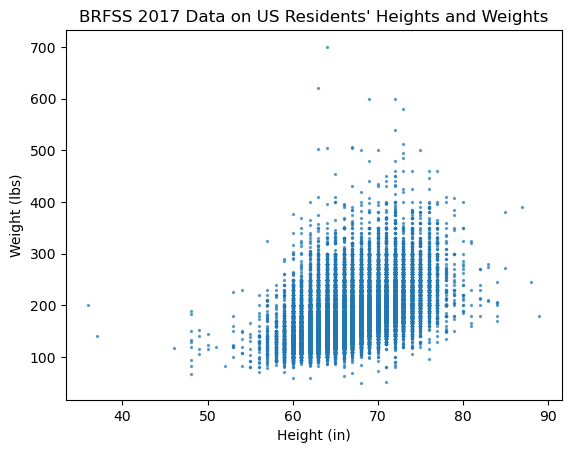

In [3]:
plt.scatter(brfss['HTIN4'][::10], brfss['WEIGHT2'][::10], 2, alpha=0.6)
plt.xlabel('Height (in)')
plt.ylabel('Weight (lbs)')
plt.title('BRFSS 2017 Data on US Residents\' Heights and Weights');

Let's use these equations to calculate the regression line for our height and weight data.  As a reminder, we are taking $h$ as the explanatory variable and $w$ as the response variable. We can get the value of $m$ from the covariances between $\mathbf{h}$ and $\mathbf{w}$, which we can get from NumPy as follows:

In [4]:
w = brfss['WEIGHT2'].to_numpy()
h = brfss['HTIN4'].to_numpy() 

In [6]:
K = np.cov(h,w)
K

array([[  17.63283104,   93.41237144],
       [  93.41237144, 2236.28813105]])

Then the slope $m$ is

In [7]:
m = K[1,0]/K[0,0]
m

5.2976388888742685

The value of $b$ is then easily calculated from $m$ and the means of $\mathbf{h}$ and $\mathbf{w}$:

In [8]:
b = w.mean() - m*h.mean()
b

-171.97804815596

In practice, we can use  `stats.linregress()`:

In [12]:
import scipy.stats as stats
regress1 = stats.linregress(h, w)
print(regress1)

LinregressResult(slope=5.297638888874269, intercept=-171.97804815596007, rvalue=0.47041319501297024, pvalue=0.0, stderr=0.015891239440058692, intercept_stderr=1.0688139979789224)


The output is an object called a `LinregressResult` that has six attributes.

| Attribute           | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| **slope**           | The slope of the regression line.                                           |
| **intercept**       | The y-intercept of the regression line.                                     |
| **rvalue**          | The correlation coefficient (can be squared to get \( R^2 \)).              |
| **pvalue**          | Two-sided p-value for testing if the slope is significantly different from 0. |
| **stderr**          | Standard error of the estimated slope.                                      |
| **intercept_stderr**| Standard error of the intercept.                                            |

It should be clear that the `slope` and `intercept` are equivalent to the values $a$ and $b$ that we found using the formulas derived from calculus. 

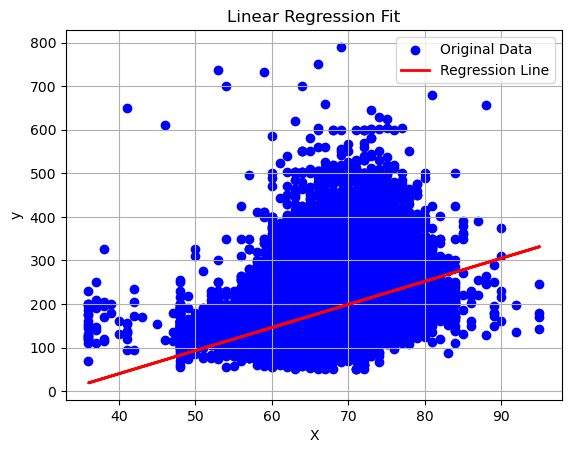

In [13]:
# plot the data

w_pred = regress1.slope* h + regress1.intercept # todo

# Plot original data
plt.scatter(h, w,  color='blue', label='Original Data')

# Plot regression line
plt.plot(h, w_pred,  color='red', linewidth=2, label='Regression Line')

# Labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

# Multiple linear regression

California Housing Dataset:
 
 

In [14]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing(as_frame=True)
df = california.frame

In [15]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


- MedInc = median income in the block group
- AveRooms = average number of rooms per household
- HouseAge = median house age
- AveOccup = average occupancy per household
- MedHouseVal = median house value (target)

1.  let's select a set of features:

In [16]:

X = df[['MedInc', 'AveRooms', 'HouseAge', 'AveOccup']]  # select a few features
y = df['MedHouseVal']

In [17]:
X.head()

,MedInc,AveRooms,HouseAge,AveOccup
0,8.3252,6.984127,41.0,2.555556
1,8.3014,6.238137,21.0,2.109842
2,7.2574,8.288136,52.0,2.802260
3,5.6431,5.817352,52.0,2.547945
4,3.8462,6.281853,52.0,2.181467


2. We will use some data with trainning data and some with testing data:
This can be done using train_test_split function

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [3]:
from sklearn.model_selection import train_test_split


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 

In [20]:
len(X_train), len(X_test)

(16512, 4128)

3. perform linear regression and analysis the mean squared error.

In [ ]:
model = Line

4. plot the fig

In [ ]:

y_pred = # todo

# Plot original data
plt.scatter(#todo, #todo,  color='blue', label='Original Data')

# Plot regression line
plt.plot(#todo, #todo,  color='red', linewidth=2, label='Regression Line')

# Labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

# Nonlinear data set

Consider the following data set, can you use linear regression to generator a predictor of y given x?

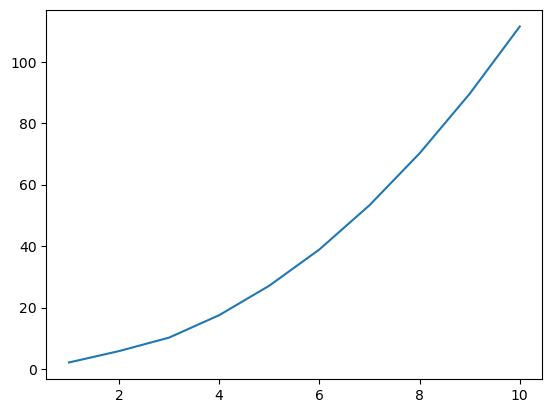

In [6]:

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([2.1, 5.8, 10.2, 17.5, 27.1, 38.9, 53.3, 70.2, 89.6, 111.5])

f = plt.figure()

plt.plot(x,y)
plt.show()

f.savefig("foo.pdf", bbox_inches='tight')

In [ ]:

y_pred = # todo

# Plot original data
plt.scatter(#todo, #todo,  color='blue', label='Original Data')

# Plot regression line
plt.plot(#todo, #todo,  color='red', linewidth=2, label='Regression Line')

# Labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()